# Decision Trees
You should build a machine learning pipeline using a decision tree model. In particular, you should do the following:
- Load the `mnist` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Train and test a decision tree model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

In [4]:
import pandas as pd
import sklearn.model_selection
import sklearn.tree
import sklearn.metrics

df = pd.read_csv("../../datasets/mnist.csv")
df = df.set_index("id") #making the id col our index, and removing it as a feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 31953 to 56752
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 24.0 MB


In [5]:
x = df.drop(["class"], axis=1) #remove col class
y = df["class"] #select the class col, as our target label

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("df:", df.shape) 
print("x_train:", x_train.shape) 
print("x_test:", x_test.shape)
print("y_train:", y_train.shape) 
print("y_test:", y_test.shape)

df: (4000, 785)
x_train: (3000, 784)
x_test: (1000, 784)
y_train: (3000,)
y_test: (1000,)


In [10]:
model = sklearn.tree.DecisionTreeClassifier(max_leaf_nodes=15)
clf = model.fit(x_train, y_train)

y_predicted = model.predict(x_test)
print(sklearn.metrics.accuracy_score(y_test, y_predicted))

0.615


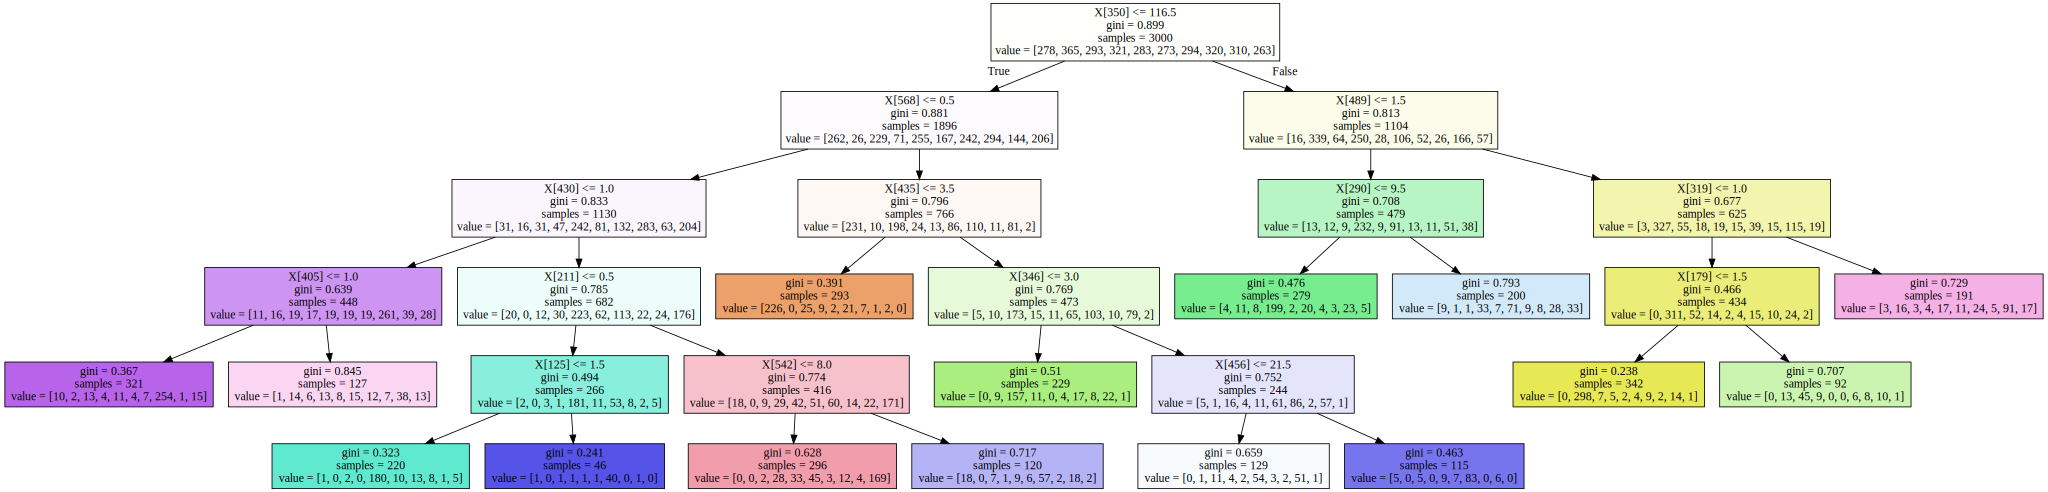

In [38]:
import graphviz 
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, filled=True) 
graph = graphviz.Source(dot_data) 
graph.render("test") 
graph